In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

(1024, 1024, 3)


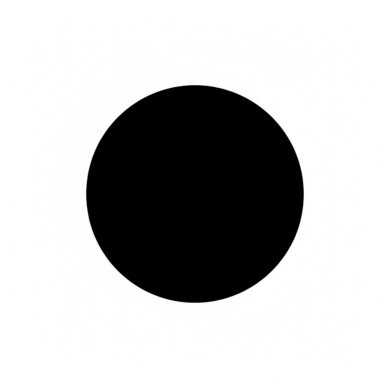

In [2]:
img = Image.open("img/circle.jpg")
img_array = np.array(img)
img_array = img_array[:,:,:3]
print(img_array.shape)
plt.imshow(img_array)
plt.axis("off")
plt.show()

# Wykrywanie krawedzi

In [3]:
S_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]])
S_y = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]])
L = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]])

P_x =np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]])

P_y = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]])


Sh_1 = np.array([
    [-3,0,3],
    [-10,0,10],
    [-3,0,3]])
Sh_2 = np.array([
    [0,3,10],
    [-3,0,3],
    [-10,-3,0]])
Sh_3 = np.array([
    [3,10,3],
    [0,0,0],
    [-3,-10,-3]])
Sh_4 = np.array([
    [10,3,0],
    [3,0,-3],
    [0,-3,-10]])

In [4]:
def edge_detection(img_array, operator):
    height, width, channels = img_array.shape
    kH, kW = operator.shape
    output = np.zeros((height, width), dtype=np.float32) 
    pad_h, pad_w = kH // 2, kW // 2
    
    padded_img = np.pad(img_array, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='reflect')
    
    for i in range(height):
        for j in range(width):
            sum_channels = 0
            for k in range(channels):
                temp = padded_img[i:i + kH, j:j + kW, k]
                sum_channels += np.sum(operator * temp)
            output[i, j] = sum_channels / channels

    return output

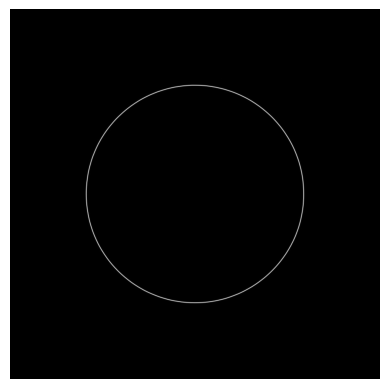

In [5]:
edge_x = edge_detection(img_array,S_x)
edge_y = edge_detection(img_array,S_y)

Sobel = np.sqrt(edge_x**2 + edge_y**2)
plt.imshow(Sobel,cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("img_res/Sobler_edge_detection.png", bbox_inches='tight', pad_inches=0)
plt.show()

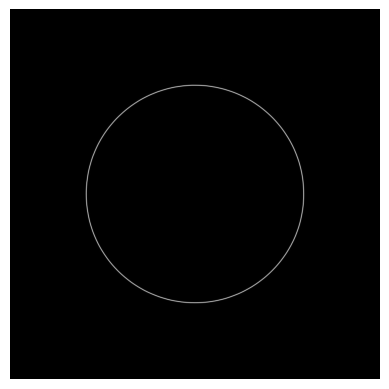

In [6]:
Pedge_x = edge_detection(img_array,P_x)
Pedge_y = edge_detection(img_array,P_y)

Prewitt = np.sqrt(Pedge_x**2 + Pedge_y**2)
plt.imshow(Prewitt,cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("img_res/Prewitt_edge_detection.png", bbox_inches='tight', pad_inches=0)
plt.show()

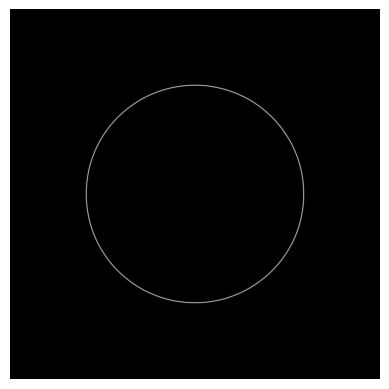

In [7]:
Sh1 = edge_detection(img_array,Sh_1)
Sh2 = edge_detection(img_array,Sh_2)
Sh3 = edge_detection(img_array,Sh_3)
Sh4 = edge_detection(img_array,Sh_4)

G_s = np.sqrt(Sh1**2 + Sh3**2)
G_d = np.sqrt(Sh2**2 + Sh4**2)

G_result = np.maximum(G_s, G_d)
plt.imshow(G_result,cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("img_res/Sharr_edge_detection.png", bbox_inches='tight', pad_inches=0)
plt.show()

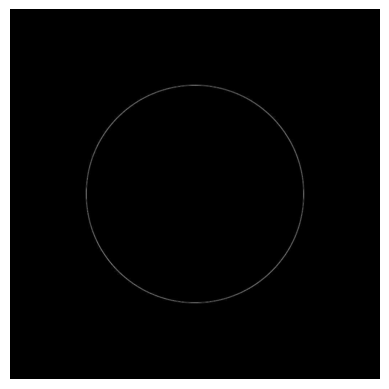

In [8]:
edge_L = edge_detection(img_array,L)
edge_L_abs = np.abs(edge_L)
plt.imshow(edge_L_abs,cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("img_res/Laplace_edge_detection.png", bbox_inches='tight', pad_inches=0)
plt.show()

# Rozmywanie

(183, 275, 3)


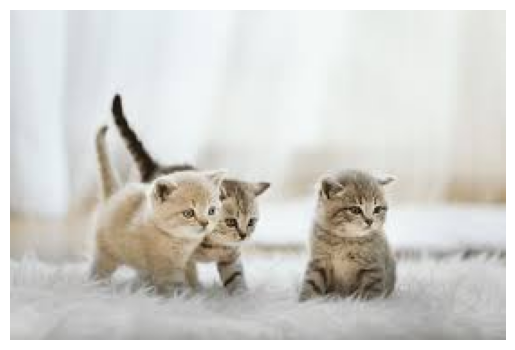

In [9]:
img = Image.open("img/1.jpg")
img_array = np.array(img)
img_array = img_array[:,:,:3]
print(img_array.shape)
plt.imshow(img_array)
plt.axis("off")
plt.show()

In [10]:
G = (1/16) * np.array([
    [1,2,1],
    [1,4,1],
    [1,2,1]])
rb = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=float)/4
G.shape

(3, 3)

In [11]:
def get_blur_kernel(size: int):
    return np.ones([size, size]) / (size ** 2)

In [12]:
def image_blurring(img_array,operator):
    height, width, channels = img_array.shape
    kH, kW = operator.shape
    output = np.zeros_like(img_array, dtype=np.float32)
    pad_h, pad_w = kH // 2, kW // 2
    padded_img = np.pad(img_array, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='reflect')
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                temp = padded_img[i:i + kH, j:j + kW, k]
                new_channel_value = np.sum(operator * temp)
                output[i, j, k] = new_channel_value

    return output

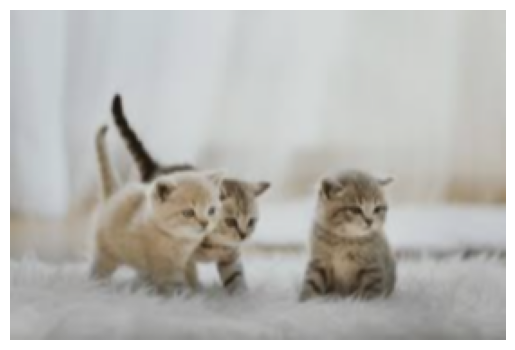

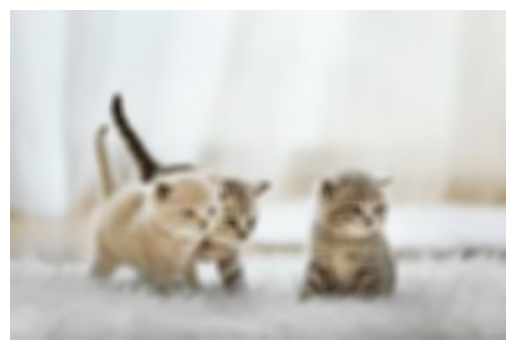

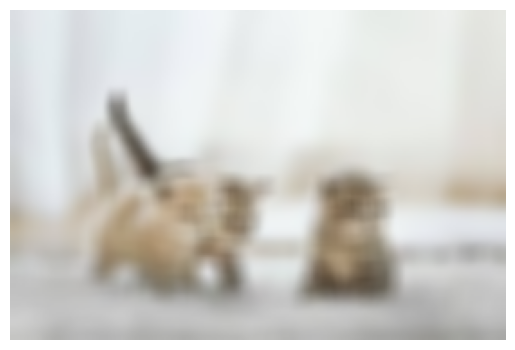

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [13]:
blurr_img_gauss = image_blurring(img_array, G)
blurr_img_gauss = np.clip(blurr_img_gauss, 0, 255).astype(np.uint8)
plt.imshow(blurr_img_gauss)
plt.axis("off")
plt.savefig("img_res/gauss_blur.png", bbox_inches='tight', pad_inches=0)
plt.show()

blur_kernel = get_blur_kernel(size=5)
blurr_img1 = image_blurring(img_array, blur_kernel)
blurr_img1 = np.clip(blurr_img1, 0, 255).astype(np.uint8)
plt.imshow(blurr_img1)
plt.axis("off")
plt.savefig("img_res/k5_blur.png", bbox_inches='tight', pad_inches=0)
plt.show()

blur_kernel2 = get_blur_kernel(size=11)
blurr_img2 = image_blurring(img_array, blur_kernel2)
blurr_img2 = np.clip(blurr_img2, 0, 255).astype(np.uint8)
plt.imshow(blurr_img2)
plt.axis("off")
plt.savefig("img_res/k11_blur.png", bbox_inches='tight', pad_inches=0)
plt.show()
print(blur_kernel)

# Wyostrzanie

In [14]:
W = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]])
High_pass=np.array([
    [-1,-1,-1],
    [-1,9,-1],
    [-1,-1,-1]])
High_pass_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 25, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
])

In [15]:
def image_sharpening(img_array,operator):
    height, width, channels = img_array.shape
    kH, kW = operator.shape
    output = np.zeros_like(img_array, dtype=np.float32)
    pad_h, pad_w = kH // 2, kW // 2
    padded_img = np.pad(img_array, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='reflect')
    for i in range(height):
        for j in range(width):
            for k in range(channels):
                temp = padded_img[i:i + kH, j:j + kW, k]
                new_channel_value = np.sum(operator * temp)
                output[i, j, k] = new_channel_value

    return output

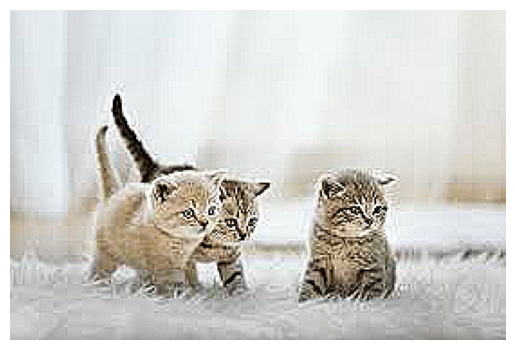

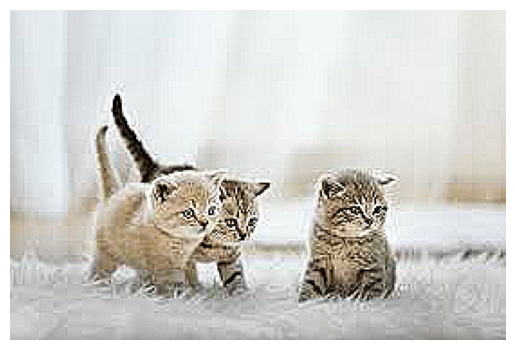

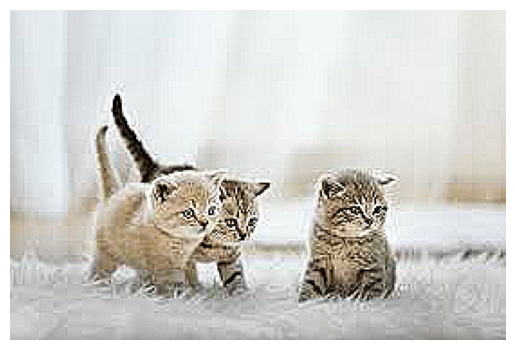

In [16]:
sharp_img = image_sharpening(img_array,W)
sharp_img = np.clip(sharp_img, 0, 255).astype(np.uint8)
plt.imshow(sharp_img)
plt.axis("off")
plt.savefig("img_res/W_sharp.png", bbox_inches='tight', pad_inches=0)
plt.show()

sharp_img2 = image_sharpening(img_array,High_pass)
sharp_img2 = np.clip(sharp_img, 0, 255).astype(np.uint8)
plt.imshow(sharp_img2)
plt.axis("off")
plt.savefig("img_res/High_pass_sharp.png", bbox_inches='tight', pad_inches=0)
plt.show()

sharp_img3 = image_sharpening(img_array,High_pass_5x5)
sharp_img3 = np.clip(sharp_img, 0, 255).astype(np.uint8)
plt.imshow(sharp_img3)
plt.axis("off")
plt.savefig("img_res/High_pass5x5_sharp.png", bbox_inches='tight', pad_inches=0)
plt.show()

# Demozaikowanie

## Filters

(100, 100, 3)


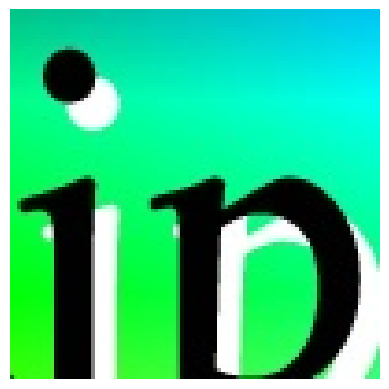

In [33]:
img = Image.open("img/ip.jpg")
img_array = np.array(img)
img_array = img_array[:,:,:3]
print(img_array.shape)
plt.imshow(img_array)
plt.axis("off")
plt.show()

In [34]:
B = np.zeros((2,2,3)) 
B[0][1][0] = 1
B[0][0][1] = 1
B[1][0][2] = 1
B[1][1][1] = 1
B.shape

(2, 2, 3)

In [35]:
def create_bayer_mask(shape=(2,2,3)): 
    mask = np.zeros(shape) 
    for height in range(mask.shape[0]): 
        for width in range(mask.shape[1]): 
            for channel in range(mask.shape[2]): 
                mask[height][width][channel] = B[height%2][width%2][channel] 
    return mask

In [36]:
bayer_filter = create_bayer_mask(img_array.shape)

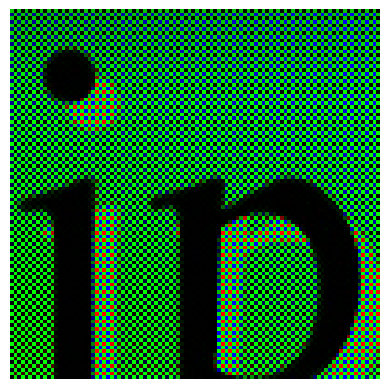

In [47]:
sensor_img = img_array * bayer_filter
sensor_img = np.clip(sensor_img, 0, 255).astype(np.uint8)

plt.imshow(sensor_img)
plt.axis("off")
plt.savefig("img_res/bayer_filtered_img.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [38]:
bayer_demosaicking_mask = np.ones((2,2,3))
bayer_demosaicking_mask[0][0] = [1,0.5,1]
bayer_demosaicking_mask[0][1] = [1,0.5,1]
bayer_demosaicking_mask[1][0] = [1,0.5,1]
bayer_demosaicking_mask[1][1] = [1,0.5,1]
bayer_demosaicking_mask

array([[[1. , 0.5, 1. ],
        [1. , 0.5, 1. ]],

       [[1. , 0.5, 1. ],
        [1. , 0.5, 1. ]]])

In [39]:
def convolve2d(image, kernel):
    H, W, C = image.shape
    kH, kW, _ = kernel.shape
    pad_h = kH // 2
    pad_w = kW // 2
    padded = np.pad(image, ((pad_h,pad_h),(pad_w,pad_w),(0,0)), mode='reflect')
    out = np.zeros_like(image, dtype=float)
    for d in range(C):
        for i in range(H):
            for j in range(W):
                patch = padded[i:i+kH, j:j+kW, d]
                out[i,j,d] = np.sum(patch * kernel[:,:,d])
    return out


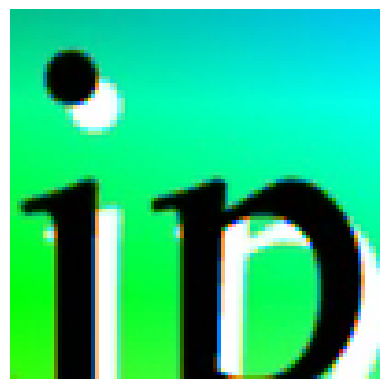

In [48]:
reconstructed1 = convolve2d(sensor_img,bayer_demosaicking_mask)
reconstructed1 = np.clip(reconstructed1, 0, 255).astype(np.uint8)

plt.imshow(reconstructed1)
plt.axis("off")
plt.savefig("img_res/bayer_reconstructed.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [41]:
def create_fuji_mask():
    mask = np.zeros((6, 6, 3))

    pattern = [
        ['G','B','R','G','B','R'],
        ['R','G','G','B','G','G'],
        ['B','G','G','R','G','G'],
        ['G','B','R','G','B','R'],
        ['R','G','G','B','G','G'],
        ['B','G','G','R','G','G']
    ]

    for y in range(6):
        for x in range(6):
            if pattern[y][x] == 'R':
                mask[y, x] = [1, 0, 0]
            elif pattern[y][x] == 'G':
                mask[y, x] = [0, 1, 0]
            else: 
                mask[y, x] = [0, 0, 1]

    return mask
F = create_fuji_mask()
print(F[:6,:6,0])
print(F[:6,:6,1])
print(F[:6,:6,2])

[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
[[1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 1. 1.]]
[[0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [42]:
def extend_fuji_mask(shape=(2,2,3)): 
    mask = np.zeros(shape) 
    for height in range(mask.shape[0]): 
        for width in range(mask.shape[1]): 
            for channel in range(mask.shape[2]): 
                mask[height][width][channel] = F[height%6][width%6][channel] 
    return mask

In [43]:
fuji_filter = extend_fuji_mask(img_array.shape)

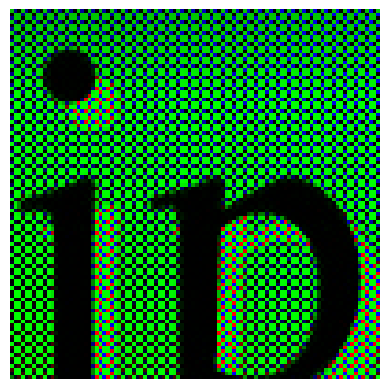

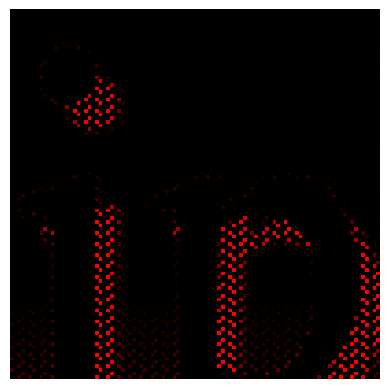

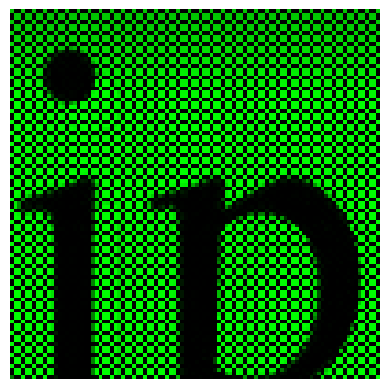

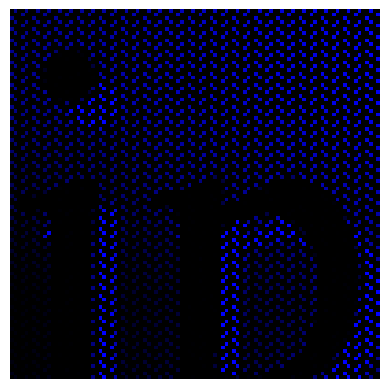

In [49]:
sensor_img2 = img_array * fuji_filter
sensor_img2 = np.clip(sensor_img2, 0, 255).astype(np.uint8)

plt.imshow(sensor_img2)
plt.axis("off")
plt.savefig("img_res/fuji_filtered_img.png", bbox_inches='tight', pad_inches=0)
plt.show()

red_only = sensor_img2 * np.array([1,0,0])
plt.imshow(red_only)
plt.axis("off")
plt.savefig("img_res/fuji_red_filtered_img.png", bbox_inches='tight', pad_inches=0)
plt.show()

green_only = sensor_img2 * np.array([0,1,0])
plt.imshow(green_only)
plt.axis("off")
plt.savefig("img_res/fuji_green_filtered_img.png", bbox_inches='tight', pad_inches=0)
plt.show()

blue_only = sensor_img2 * np.array([0,0,1])
plt.imshow(blue_only)
plt.axis("off")
plt.savefig("img_res/fuji_blue_filtered_img.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [45]:
def create_fuji_demosaicking_kernel(F):
    kernel = np.zeros((6, 6, 3), dtype=float)
    WAGA_WŁASNA = 4.0
    WAGA_SĄSIEDNIA = 1.0

    for d in range(3):
        for y in range(6):
            for x in range(6):
                if F[y, x, d] == 1:
                    kernel[y, x, d] = WAGA_WŁASNA
                else:
                    kernel[y, x, d] = WAGA_SĄSIEDNIA
        
        # Normalizacja
        suma = np.sum(kernel[:, :, d])
        if suma > 0:
            kernel[:, :, d] /= suma
    return kernel

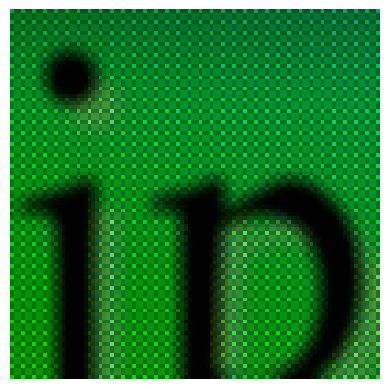

In [50]:
fuji_demosaicking_kernel = create_fuji_demosaicking_kernel(F)
reconstructed2 = convolve2d(sensor_img2, fuji_demosaicking_kernel)
reconstructed2 = np.clip(reconstructed2, 0, 255).astype(np.uint8)
plt.imshow(reconstructed2)
plt.axis("off")
plt.savefig("img_res/fuji_reconstructed.png", bbox_inches='tight', pad_inches=0)
plt.show()
